In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
cali_dataset = fetch_california_housing()
data = pd.DataFrame(data=cali_dataset.data, columns=cali_dataset.feature_names)
data['PRICE'] = cali_dataset.target

## Split Training and Test Data

In [3]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)
x_train,x_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

In [4]:
#calculating percent of training set
len(x_train)/len(features)

0.8

In [5]:
#calculating percent of test dataset
x_test.shape[0]/features.shape[0]

0.2

In [6]:
regr = LinearRegression()
regr.fit(x_train,y_train)
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_,index=x_train.columns,columns=['coef'])

Intercept -37.48696576537296


,coef
MedInc,0.433102
HouseAge,0.009324
AveRooms,-0.100333
AveBedrms,0.615219
Population,-0.000003
AveOccup,-0.004782
Latitude,-0.429077
Longitude,-0.441484


In [7]:
#printing r-squared for training and tast datasets
print('Training data r-squared:',regr.score(x_train,y_train))
print('Test data r-squared:',regr.score(x_test,y_test))

Training data r-squared: 0.6074049305021048
Test data r-squared: 0.6009790143129101


# Data Transformations

In [8]:
data['PRICE'].skew()

0.9777632739098345

In [9]:
y_log=np.log(data['PRICE'])
print(y_log.tail())

20635   -0.247180
20636   -0.260067
20637   -0.080126
20638   -0.166055
20639   -0.112050
Name: PRICE, dtype: float64


C:\Users\aadit\AppData\Local\Temp\ipykernel_5992\4200263691.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_log)


Text(0.5, 1.0, 'Log price with skew -0.17317539032496646')

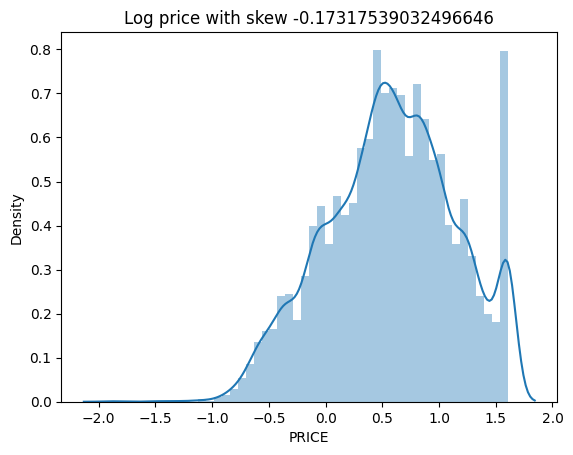

In [10]:
y_log.skew()
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')

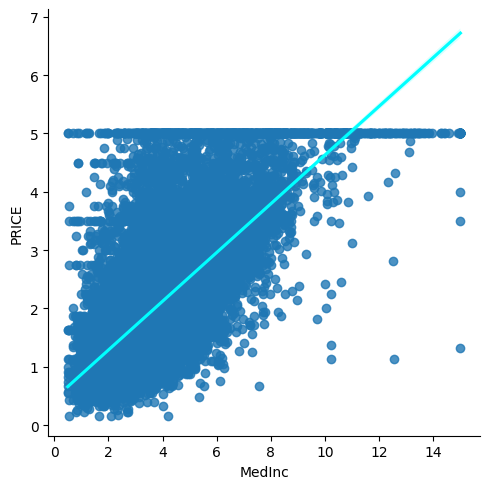

In [11]:
sns.lmplot(x='MedInc', y='PRICE',data=data, line_kws={'color':'cyan'})
plt.show()

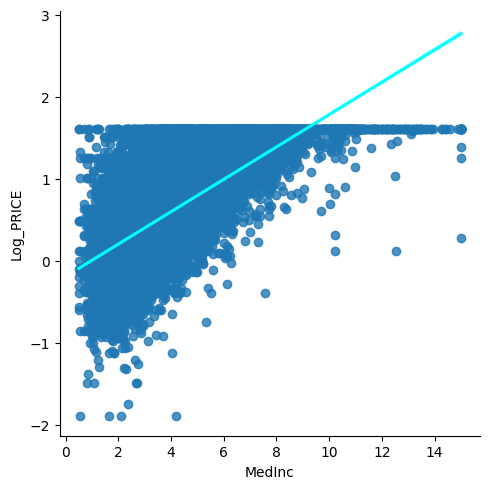

In [12]:
#Now we use the log prices
transformed_data=features
transformed_data['Log_PRICE'] = y_log
sns.lmplot(x='MedInc', y='Log_PRICE',data=transformed_data,line_kws={'color':'cyan'})
plt.show()

## Regression using log Prices

In [13]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)
x_train,x_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

In [14]:
regr=LinearRegression()
regr.fit(x_train,y_train)
print('Training data r-squared:',regr.score(x_train,y_train))
print('Test data r-squared:', regr.score(x_test,y_test))
print('Intercept',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=x_train.columns,columns=['coef'])


Training data r-squared: 0.6168233836099825
Test data r-squared: 0.603748925670488
Intercept -24.57049046084647


,coef
MedInc,0.186068
HouseAge,0.002279
AveRooms,-0.030865
AveBedrms,0.224873
Population,0.000008
AveOccup,-0.002259
Latitude,-0.289071
Longitude,-0.289146


In [15]:
np.e**(0.002279)

1.0022815988944185

In [20]:
x_incl_const = sm.add_constant(x_train)
model=sm.OLS(y_train,x_incl_const)
results = model.fit()
results.params

const        -24.570490
MedInc         0.186068
HouseAge       0.002279
AveRooms      -0.030865
AveBedrms      0.224873
Population     0.000008
AveOccup      -0.002259
Latitude      -0.289071
Longitude     -0.289146
dtype: float64

# Multicollinearity

# $$TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX..... + \alpha_ {12}LSTAT $$

# $$VIF_{TAX} = \frac{1}{(1-R_{TAX}^2)}$$